In [15]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [5]:
BAC = data.DataReader("BAC",'yahoo',start,end)
C = data.DataReader("C",'yahoo',start,end)
GS = data.DataReader("GS",'yahoo',start,end)
JPM = data.DataReader("JPM",'yahoo',start,end)
MS = data.DataReader("MS",'yahoo',start,end)
WFC = data.DataReader("WFC",'yahoo',start,end)

In [9]:
tickers = ['BAC','C','GS','JPM','MS','WFC']
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.columns.names =['Bank Ticker', 'Stock Info']


In [10]:
#What is the max close price for each bank stock throughout the whole period?
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [11]:
#OR with .xs
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [12]:
#create an empty dataframe called returns which will contain the returns for each banks stock as defined by financial formula which in turn will be looped into to create it by the Pandas pct_change()
returns = pd.DataFrame()

In [13]:
for tick in tickers:
    returns[tick+'return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACreturn,Creturn,GSreturn,JPMreturn,MSreturn,WFCreturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


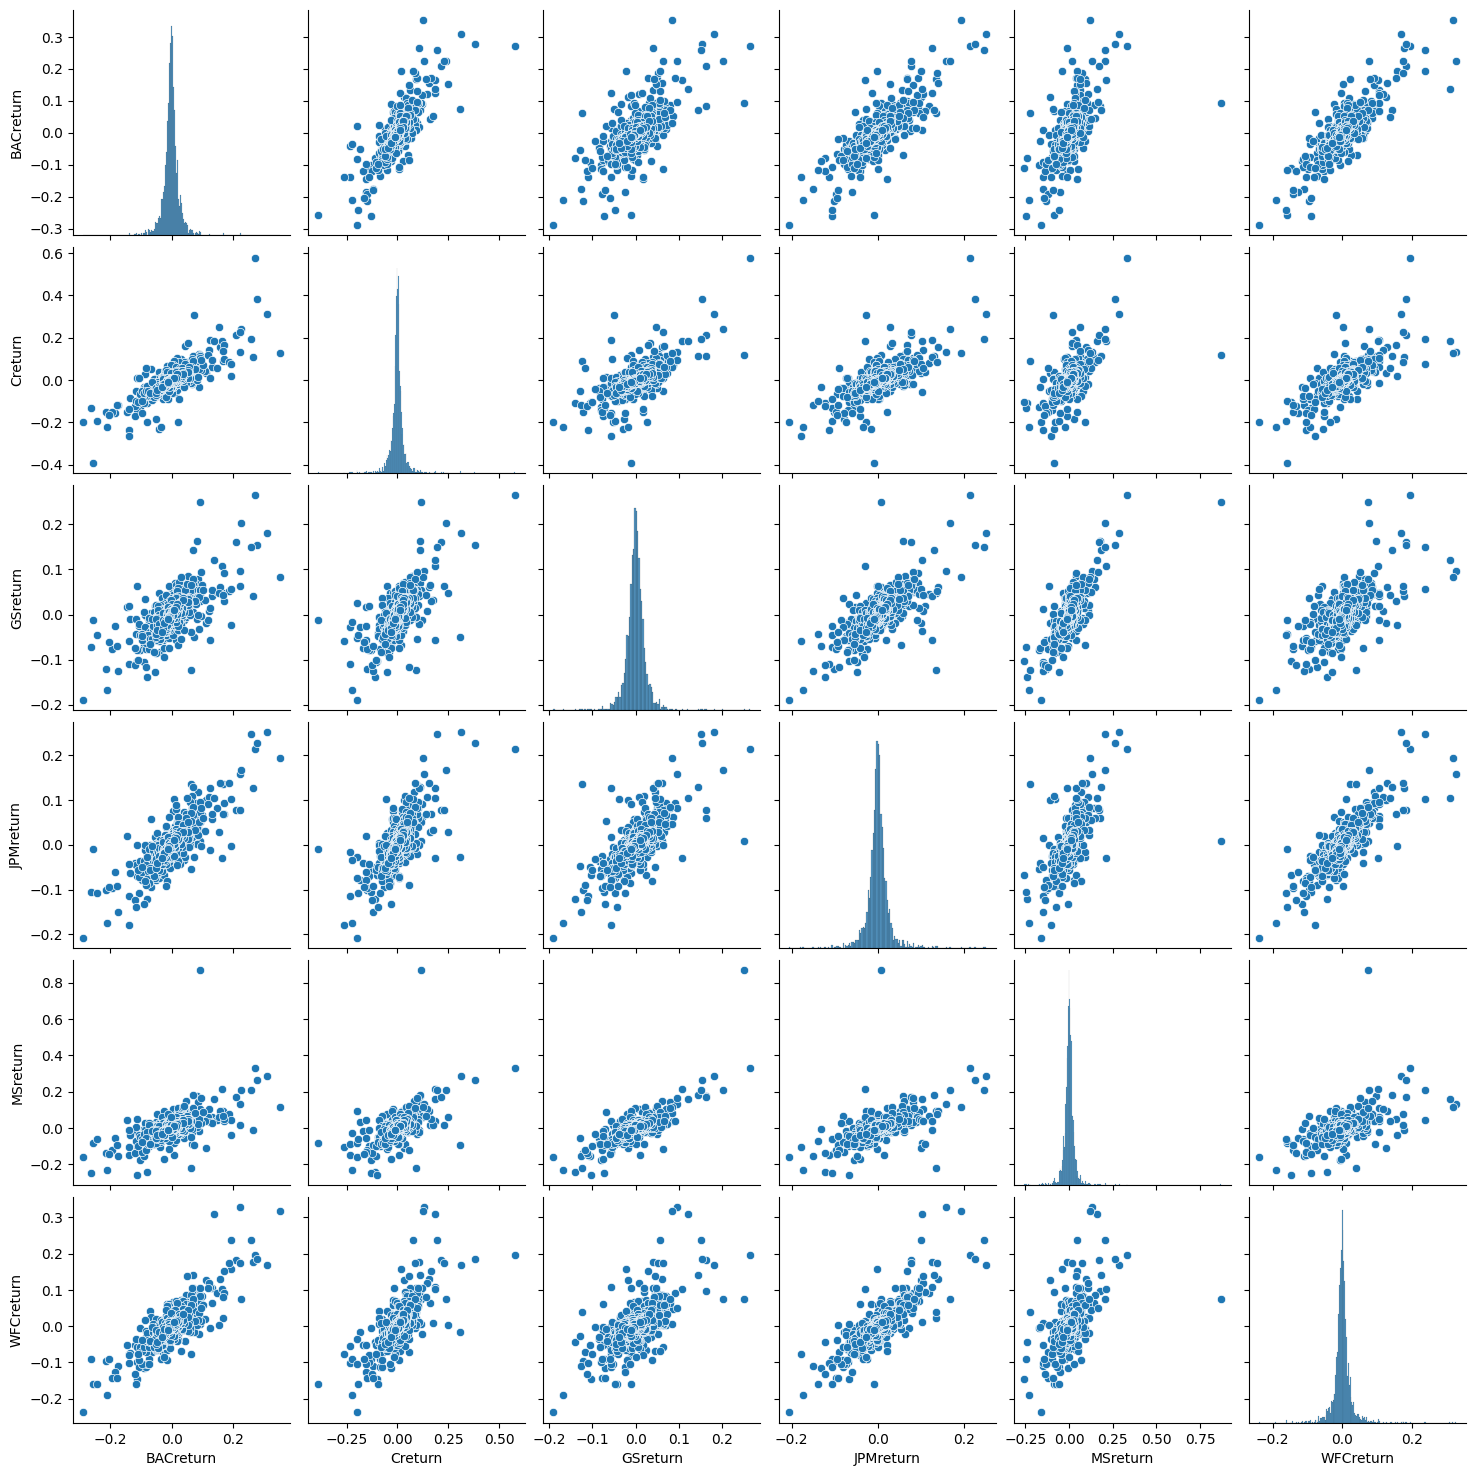

In [17]:
#create a seaborn pairplot of the returns dataframe. What stock stands out & why?
#CAUTION: since first row is NaNs, we must remove it from plotting
sns.pairplot(returns[1:]);

In [19]:
#what dates each bank stock had the worst single day returns?
returns.idxmin()

BACreturn   2009-01-20
Creturn     2009-02-27
GSreturn    2009-01-20
JPMreturn   2009-01-20
MSreturn    2008-10-09
WFCreturn   2009-01-20
dtype: datetime64[ns]

In [21]:
#and the best ?
returns.idxmax()

BACreturn   2009-04-09
Creturn     2008-11-24
GSreturn    2008-11-24
JPMreturn   2009-01-21
MSreturn    2008-10-13
WFCreturn   2008-07-16
dtype: datetime64[ns]

In [22]:
#Which is the riskiest stock? = mind that risk is measured by the standard deviation...
returns.std()

BACreturn    0.036647
Creturn      0.038672
GSreturn     0.025390
JPMreturn    0.027667
MSreturn     0.037819
WFCreturn    0.030238
dtype: float64

In [25]:
#and the riskiest for 2015? Lets slice it..
returns.loc['2015-01-01':'2015-12-31'].std()

BACreturn    0.016163
Creturn      0.015289
GSreturn     0.014046
JPMreturn    0.014017
MSreturn     0.016249
WFCreturn    0.012591
dtype: float64

<AxesSubplot: xlabel='MSreturn', ylabel='Count'>

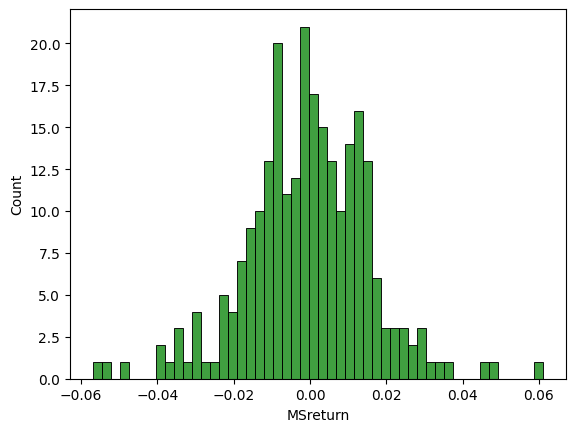

In [28]:
#Now lets plot Morgan Stanleys returns for 2015
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MSreturn'], color='green', bins=50)


<AxesSubplot: xlabel='Creturn', ylabel='Count'>

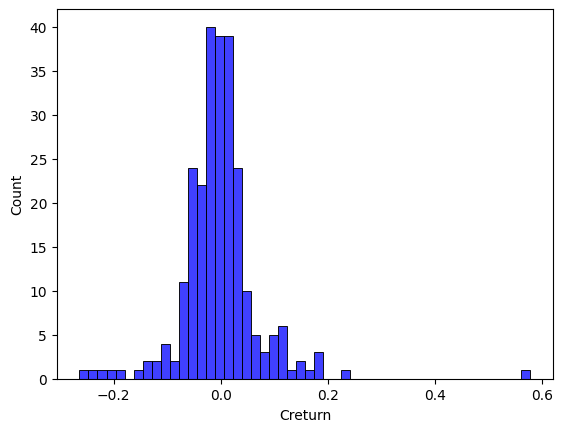

In [31]:
#and citigroup returns on 2008
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['Creturn'], color='blue', bins=50)


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

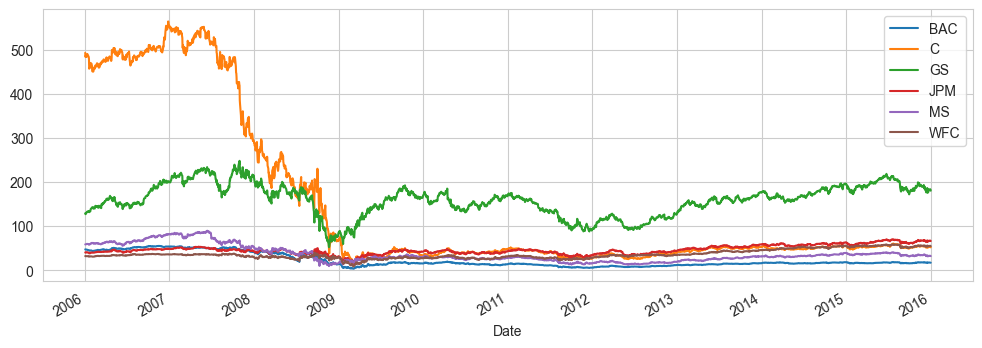

In [33]:
#create a line plot showing close price for each bank for the entire time index
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<AxesSubplot: xlabel='Date'>

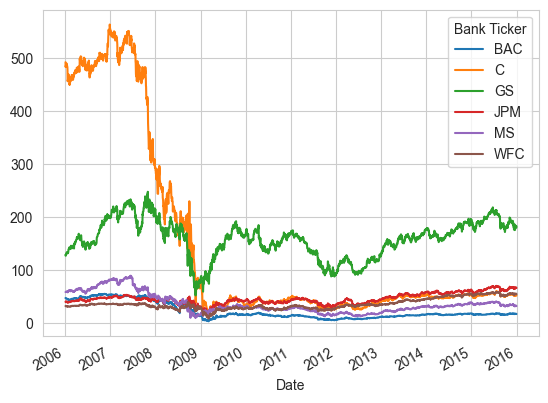

In [35]:
#with .xs
bank_stocks.xs(key='Close',axis=1,level='Stock Info')

bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [36]:
#now cufflinks interactive

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

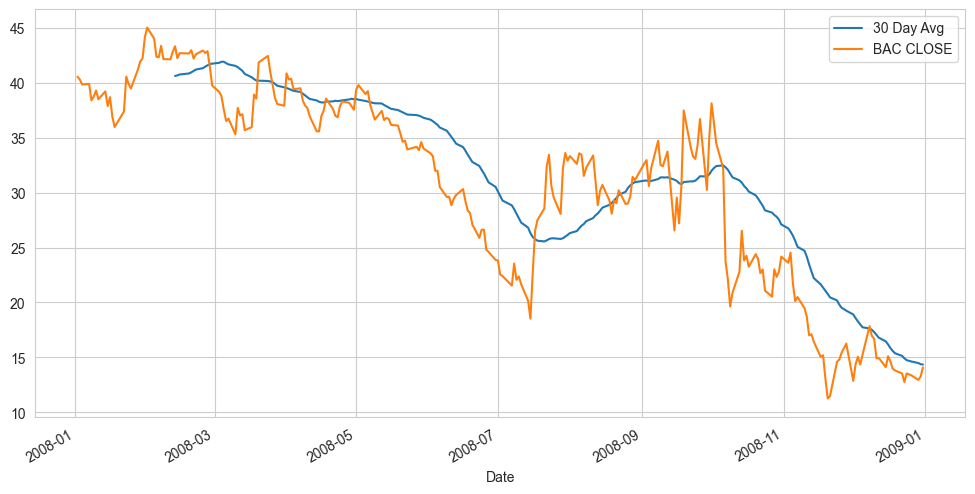

In [40]:
#Moving Averages
#plot the rolling 30 day average against the close price for BAC stock for 2008
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

In [41]:
#to create a correlation heatmap, we need to create a new dataframe with .xs=crossection of the closing prices
bank_stocks.xs(key='Close',axis=1,level='Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001


In [48]:
#correlate it
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

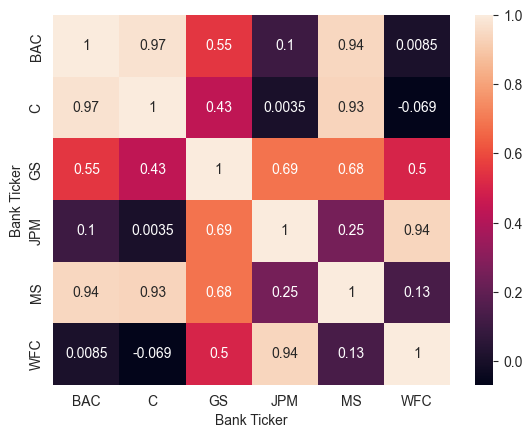

In [49]:
#Now plot it
sns.heatmap(close_corr,annot=True);

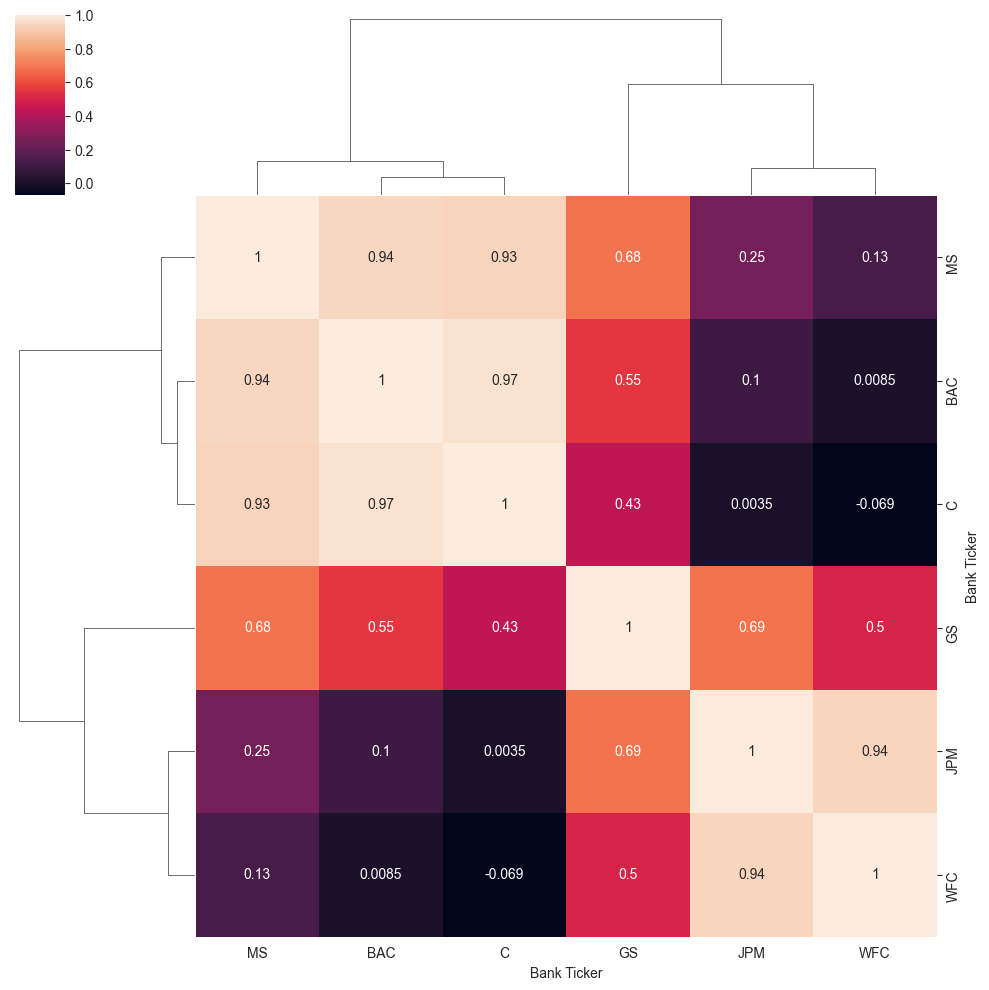

In [50]:
#Now plot a cluster map
sns.clustermap(close_corr,annot=True);

In [51]:
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


In [55]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [58]:
#now an interactive candle plot for BAC 2015
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

In [60]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

In [62]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')